In [3]:
from asm import propagate_spatial_asm
import matplotlib.pyplot as plt
import jax.numpy as jnp

In [4]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to mtch 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(tex_fonts)

In [5]:
N = 2048                # Number of grid points per side
L = 1.0e-3              # Grid side length (2 mm)
wavelength = 800e-9     # Wavelength (800 nm)
w0 = 100e-6             # Initial beam waist (100 um)

z_R = (jnp.pi * w0**2) / wavelength
z_prop = 2.0 * z_R

x = jnp.linspace(-L/2, L/2, N)
y = jnp.linspace(-L/2, L/2, N)
X, Y = jnp.meshgrid(x, y, indexing='ij')

# --- Initial Field (Gaussian Beam at z=0) ---
E_in = jnp.exp(-(X**2 + Y**2) / w0**2)
E_in = E_in.astype(jnp.complex128) # Ensure complex type
I_in = jnp.abs(E_in)**2

E_out = propagate_spatial_asm(E_in, z_prop, L, wavelength)
I_out = jnp.abs(E_out)**2

slice_in = I_in[N//2, :]
slice_out = I_out[N//2, :]
x_mm = x * 1e3 # x-axis in mm

/home/juardilag/miniconda3/envs/FemtoPy/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:122: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


/tmp/ipykernel_12585/91739305.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


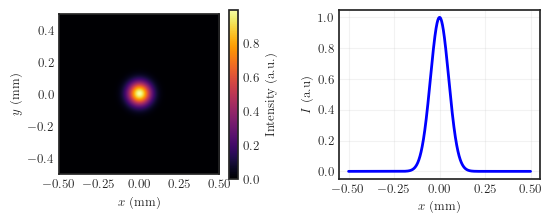

In [6]:
fig, ax = plt.subplots(1,2,figsize=(6.2, 2.2), gridspec_kw={'wspace': 0.4})

im = ax[0].imshow(I_in, extent=[x_mm[0], x_mm[-1], x_mm[0], x_mm[-1]], cmap='inferno', interpolation='bilinear')
ax[0].set_xlabel(r'$x$ (mm)')
ax[0].set_ylabel(r'$y$ (mm)')
plt.colorbar(im, label='Intensity (a.u.)')

ax[1].plot(x_mm, slice_in / jnp.max(slice_in), label='Input', color='blue', linewidth=2)
ax[1].grid(alpha = 0.25)
ax[1].set_xlabel(r'$x$ (mm)')
ax[1].set_ylabel(r'$I$ (a.u)')

plt.tight_layout()
plt.savefig('initial_space_profile.png', dpi = 300, bbox_inches ='tight')
plt.show()

/tmp/ipykernel_12585/2393920812.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


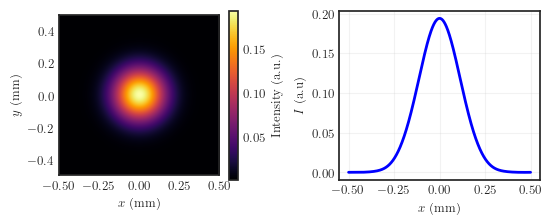

In [7]:
fig, ax = plt.subplots(1,2,figsize=(6.2, 2.2), gridspec_kw={'wspace': 0.4})

im = ax[0].imshow(I_out, extent=[x_mm[0], x_mm[-1], x_mm[0], x_mm[-1]], cmap='inferno', interpolation='bilinear')
ax[0].set_xlabel(r'$x$ (mm)')
ax[0].set_ylabel(r'$y$ (mm)')
plt.colorbar(im, label='Intensity (a.u.)')

ax[1].plot(x_mm, slice_out / jnp.max(slice_in), label='Input', color='blue', linewidth=2)
ax[1].grid(alpha = 0.25)
ax[1].set_xlabel(r'$x$ (mm)')
ax[1].set_ylabel(r'$I$ (a.u)')

plt.tight_layout()
plt.savefig('final_space_profile.png', dpi = 300, bbox_inches ='tight')
plt.show()